#### Business Objective:
	This is a sample dataset which consists of 161297 drug name, condition reviews and ratings from different patients and our goal is to examine how patients are feeling using the drugs their positive and negative experiences so that we can recommend him a suitable drug. By analyzing the reviews, we can understand the drug effectiveness and its side effects. 
    The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.
    So in this dataset, we can see many patients conditions but we will focus only on the below, classify the below conditions from the patients reviews 
    a. Depression
    c. High Blood Pressure
    d. Diabetes, Type 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('drugsCom_raw.tsv',sep = '\t')

In [4]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [5]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
df.shape

(161297, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [7]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [8]:
condition1 = ['Depression','High Blood Pressure','Diabetes, Type 2']
df1=df[df['condition'].isin(condition1)]
df1

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [9]:
df1.isnull().any()

Unnamed: 0     False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 871.5+ KB


<Axes: >

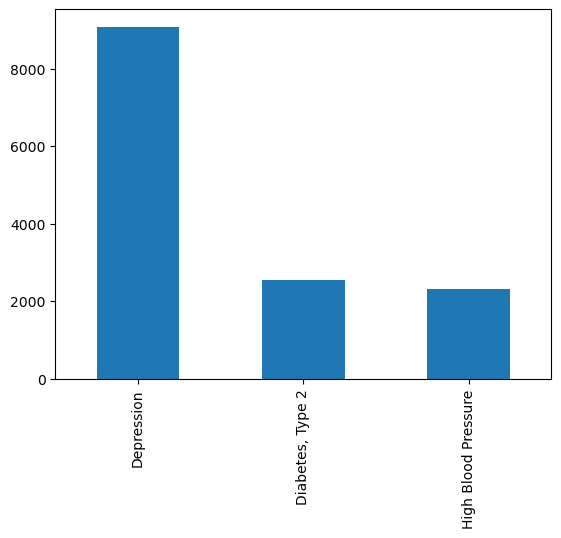

In [12]:
df1['condition'].value_counts().plot(kind='bar')

In [14]:
print ('Total No of Unique char in drugName :', df1['drugName'].nunique())
print ('Total No of Unique char in condition :', df1['condition'].nunique())
print ('Total No of Unique char in usefulCount :', df1['usefulCount'].nunique())

Total No of Unique char in drugName : 334
Total No of Unique char in condition : 3
Total No of Unique char in usefulCount : 300


In [15]:
df1.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [16]:
to_drop = ['Unnamed: 0','date']
df1 = df1.drop(to_drop, axis=1)

In [17]:
df1.reset_index(inplace = True, drop = True)
df1

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33


In [18]:
df1['usefulCount'].describe().sort_index

<bound method Series.sort_index of count    13944.000000
mean        45.737880
std         51.782627
min          0.000000
25%         16.000000
50%         31.000000
75%         59.000000
max       1291.000000
Name: usefulCount, dtype: float64>

In [19]:
(df1['usefulCount'].value_counts().sort_values(ascending=False).head(10))

13    302
15    282
18    267
17    264
21    264
23    256
10    254
22    248
9     248
16    239
Name: usefulCount, dtype: int64

### Top 10 Drugs for : Depression 

In [21]:
Dep = df1[df1['condition'].isin(['Depression'])]
Dep

,drugName,condition,review,rating,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166
5,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",4.0,15
...,...,...,...,...,...
13934,Zoloft,Depression,"""After a little over two months taking 50mg of...",8.0,80
13935,Rexulti,Depression,"""in my third week of 05 mg as add on to Paxil,...",8.0,41
13936,Seroquel,Depression,"""I have been on Seroquel for several years and...",10.0,36
13938,Sertraline,Depression,"""I have been taking Wellbutrin for a while for...",3.0,6


In [27]:
print ('Total No of Unique char in drugName :', Dep['drugName'].nunique())

Total No of Unique char in drugName : 105


In [26]:
# Top 10 drugs by names 
Dep['drugName'].value_counts(ascending = False).head(10)

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Name: drugName, dtype: int64

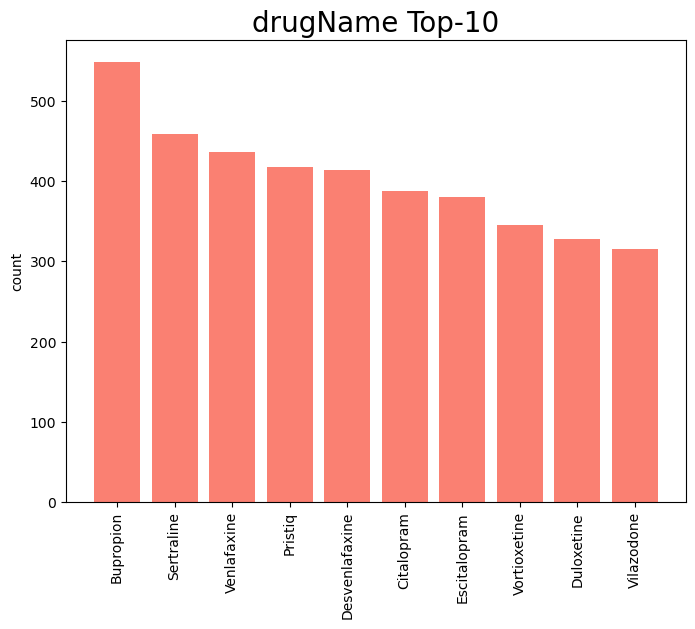

In [28]:
#plot a bargraph to check top 10 drugName
plt.figure(figsize=(8,6))
drugName_top = Dep['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='salmon')
plt.title('drugName Top-10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [29]:
# Top 10 drugs by higest useful counts 
Dep['usefulCount'].sort_values(ascending = False).head(10)

617      1291
2834     1291
12663     949
13214     771
205       771
511       693
7795      693
5762      680
12602     644
1563      621
Name: usefulCount, dtype: int64

In [30]:
Dep[Dep['usefulCount'] == 1291]

,drugName,condition,review,rating,usefulCount
617,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10.0,1291
2834,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10.0,1291


In [31]:
Dep[Dep['usefulCount'] == 1291].index

Int64Index([617, 2834], dtype='int64')

In [32]:
print (Dep['drugName'].loc[617])
print (Dep['drugName'].loc[2834])
print (Dep['drugName'].loc[12663])
print (Dep['drugName'].loc[13214])
print (Dep['drugName'].loc[205])
print (Dep['drugName'].loc[511])
print (Dep['drugName'].loc[7795])
print (Dep['drugName'].loc[5762])
print (Dep['drugName'].loc[12602])
print (Dep['drugName'].loc[1563])

Sertraline
Zoloft
Zoloft
Celexa
Citalopram
Viibryd
Vilazodone
Zoloft
Zoloft
Duloxetine


In [33]:
# Drugs which are having rating as 10 
Dep[Dep['rating'] == 10].nunique()
# This indicates there are 96 differnt kind of drugs which are having higest rating of 10 
# this feature can be neglacted as result in too many options to recomend 

drugName         96
condition         1
review         1762
rating            1
usefulCount     252
dtype: int64

### Top 10 Drugs for : High Blood Pressure  

In [34]:
Bp = df1[df1['condition'].isin(['High Blood Pressure'])]
Bp

,drugName,condition,review,rating,usefulCount
7,Amlodipine / olmesartan,High Blood Pressure,"""My blood pressure has been around 160/100. Do...",10.0,10
15,Lisinopril,High Blood Pressure,"""I&#039;m a 27 year old white male in good sha...",10.0,55
17,Metoprolol,High Blood Pressure,"""I have been on metoprolol er 12.5mg since Sep...",2.0,19
36,Prazosin,High Blood Pressure,"""Using this for parasomnia, bph and bp. Kind o...",6.0,2
43,Metoprolol,High Blood Pressure,"""I took Lopressor for 24 years it worked very ...",10.0,55
...,...,...,...,...,...
13932,Bystolic,High Blood Pressure,"""I&#039;m a 54 years old non-smoker, 5&#039;8&...",10.0,76
13937,Losartan,High Blood Pressure,"""I took this along with a beta blocker,and alt...",2.0,105
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25


In [35]:
# Top 10 drugs by names 
Bp['drugName'].value_counts(ascending = False).head(10)

Lisinopril             264
Losartan               166
Amlodipine             153
Nebivolol              110
Bystolic                99
Metoprolol              92
Olmesartan              72
Hydrochlorothiazide     66
Valsartan               66
Atenolol                62
Name: drugName, dtype: int64

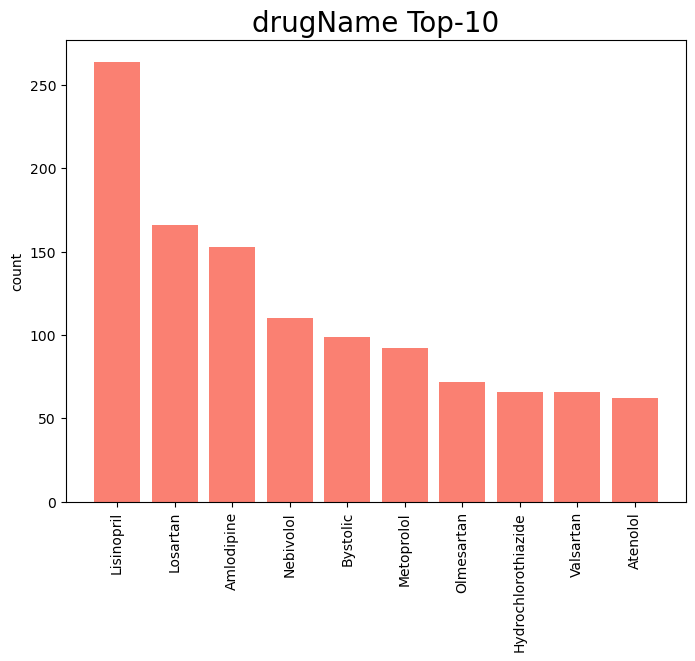

In [36]:
#plot a bargraph to check top 10 drugName
plt.figure(figsize=(8,6))
drugName_top = Bp['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='salmon')
plt.title('drugName Top-10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [37]:
# Top 10 drugs by higest useful counts 
Bp['usefulCount'].sort_values(ascending = False).head(10)

12011    317
11418    308
6738     291
10743    288
3843     285
6195     233
9954     233
3771     228
3083     221
2405     220
Name: usefulCount, dtype: int64

In [38]:
print (Bp['drugName'].loc[12011])
print (Bp['drugName'].loc[11418])
print (Bp['drugName'].loc[6738])
print (Bp['drugName'].loc[10743])
print (Bp['drugName'].loc[3843])
print (Bp['drugName'].loc[6195])
print (Bp['drugName'].loc[9954])
print (Bp['drugName'].loc[3771])
print (Bp['drugName'].loc[3083])
print (Bp['drugName'].loc[2405])

Cozaar
Norvasc
Cozaar
Losartan
Lisinopril
Norvasc
Amlodipine
Losartan
Lisinopril
Losartan


In [39]:
# Drugs which are having rating as 10 
Bp[Bp['rating'] == 10].nunique()
# This indicates there are 108 differnt kind of drugs which are having higest rating of 10 
# this feature can be neglacted as result in too many options to recomend 

drugName       108
condition        1
review         388
rating           1
usefulCount    114
dtype: int64

### Top 10 Drugs for : Diabetes, Type 2 

In [40]:
Db = df1[df1['condition'].isin(['Diabetes, Type 2'])]
Db

,drugName,condition,review,rating,usefulCount
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
9,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,12
13,Liraglutide,"Diabetes, Type 2","""have only been on victorza for a few days. I...",5.0,18
16,Empagliflozin,"Diabetes, Type 2","""I have been taking Jardiance for just over a ...",10.0,47
19,Victoza,"Diabetes, Type 2","""I&#039;ve been on Victoza for 13 days and hav...",10.0,6
...,...,...,...,...,...
13921,Liraglutide,"Diabetes, Type 2","""I have been on Victoza for 4 weeks now. I st...",9.0,38
13925,Trulicity,"Diabetes, Type 2","""I have been on this medication for the last m...",9.0,27
13926,Victoza,"Diabetes, Type 2","""Started off 6-7 months ago with low dose then...",5.0,3
13931,Liraglutide,"Diabetes, Type 2","""I took Victoza for a few months and it caused...",1.0,9


In [41]:
# Top 10 drugs by names 
Db['drugName'].value_counts(ascending = False).head(10)

Liraglutide      270
Victoza          255
Dulaglutide      231
Trulicity        221
Exenatide        192
Canagliflozin    146
Invokana         143
Bydureon         136
Metformin         81
Byetta            51
Name: drugName, dtype: int64

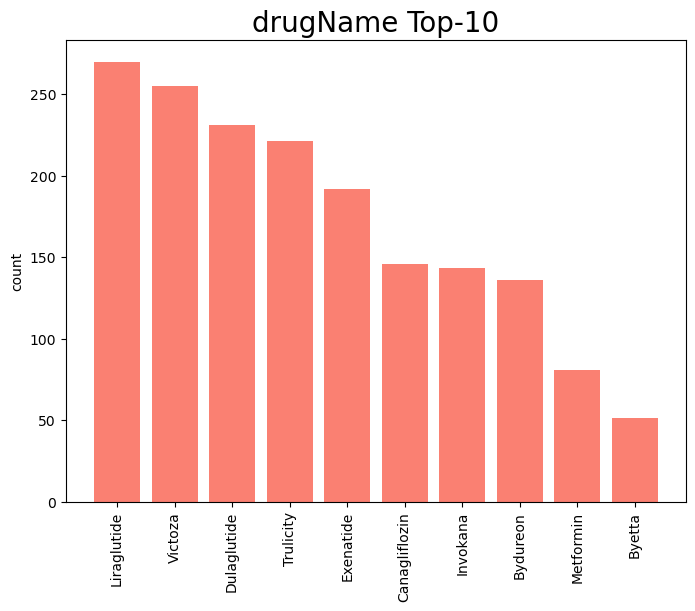

In [42]:
#plot a bargraph to check top 10 drugName
plt.figure(figsize=(8,6))
drugName_top = Db['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='salmon')
plt.title('drugName Top-10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [43]:
# Top 10 drugs by higest useful counts 
Db['usefulCount'].sort_values(ascending = False).head(10)

557      198
12190    186
12442    186
7463     184
7102     169
7817     167
7995     167
6608     167
1924     161
4061     161
Name: usefulCount, dtype: int64

In [44]:
print (Db['drugName'].loc[557])
print (Db['drugName'].loc[12190])
print (Db['drugName'].loc[12442])
print (Db['drugName'].loc[7463])
print (Db['drugName'].loc[7102])
print (Db['drugName'].loc[7817])
print (Db['drugName'].loc[7995])
print (Db['drugName'].loc[6608])
print (Db['drugName'].loc[1924])
print (Db['drugName'].loc[4061])

Victoza
Canagliflozin
Invokana
Glucophage XR
Victoza
Liraglutide
Victoza
Metformin
Glipizide
Glucotrol


In [45]:
# Drugs which are having rating as 10 
Db[Db['rating'] == 10].nunique()
# This indicates there are 72 differnt kind of drugs which are having higest rating of 10 
# this feature can be neglacted as result in too many options to recomend

drugName        72
condition        1
review         469
rating           1
usefulCount    112
dtype: int64

In [46]:
Db

,drugName,condition,review,rating,usefulCount
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24
9,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,12
13,Liraglutide,"Diabetes, Type 2","""have only been on victorza for a few days. I...",5.0,18
16,Empagliflozin,"Diabetes, Type 2","""I have been taking Jardiance for just over a ...",10.0,47
19,Victoza,"Diabetes, Type 2","""I&#039;ve been on Victoza for 13 days and hav...",10.0,6
...,...,...,...,...,...
13921,Liraglutide,"Diabetes, Type 2","""I have been on Victoza for 4 weeks now. I st...",9.0,38
13925,Trulicity,"Diabetes, Type 2","""I have been on this medication for the last m...",9.0,27
13926,Victoza,"Diabetes, Type 2","""Started off 6-7 months ago with low dose then...",5.0,3
13931,Liraglutide,"Diabetes, Type 2","""I took Victoza for a few months and it caused...",1.0,9


In [47]:
ratings_ = df1['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/df1.shape[0])
print(ratings_)

   rating  counts    percent
0    10.0    3763  26.986517
1     9.0    2468  17.699369
2     1.0    1802  12.923121
3     8.0    1795  12.872920
4     7.0     995   7.135686
5     5.0     756   5.421687
6     6.0     680   4.876649
7     2.0     645   4.625645
8     3.0     582   4.173838
9     4.0     458   3.284567


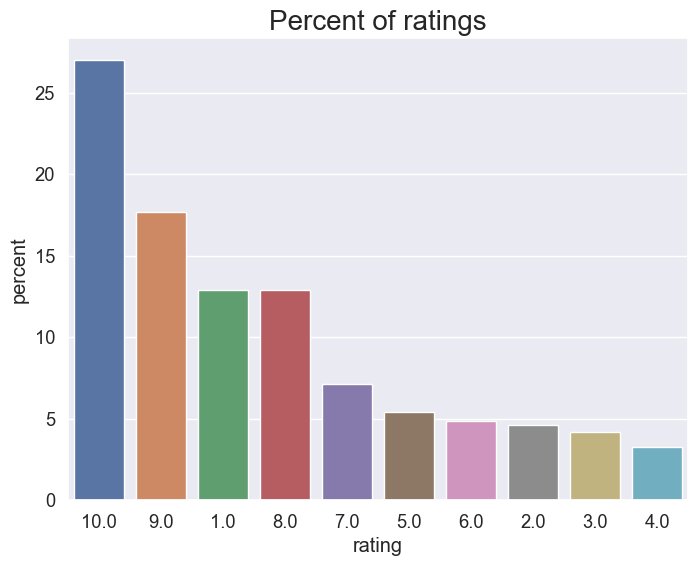

In [48]:
# Setting the Parameter
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [8, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Percent of ratings',fontsize=20)
plt.show()

In [49]:
# let's make a new column review sentiment 

df1.loc[(df1['rating'] >= 5), 'Review_Sentiment'] = 1
df1.loc[(df1['rating'] < 5), 'Review_Sentiment'] = 0

df1['Review_Sentiment'].value_counts()

1.0    10457
0.0     3487
Name: Review_Sentiment, dtype: int64

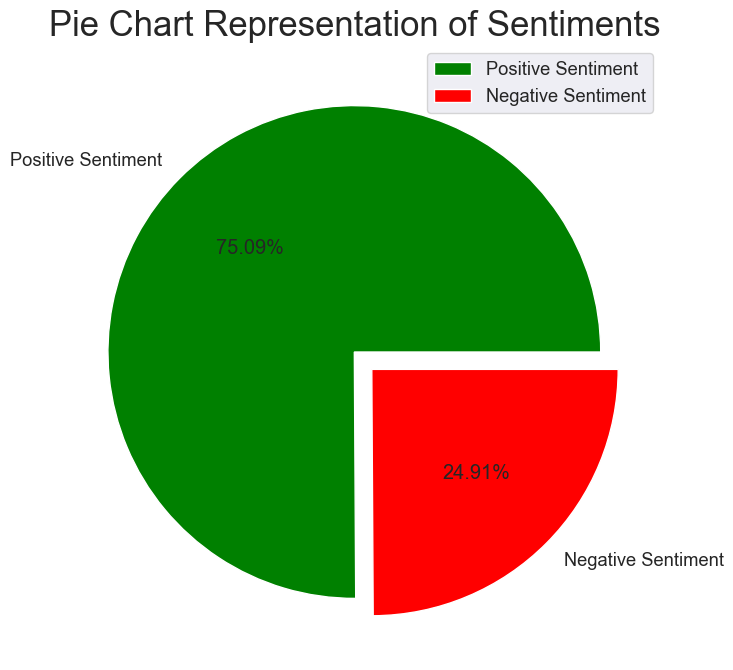

In [50]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['green', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

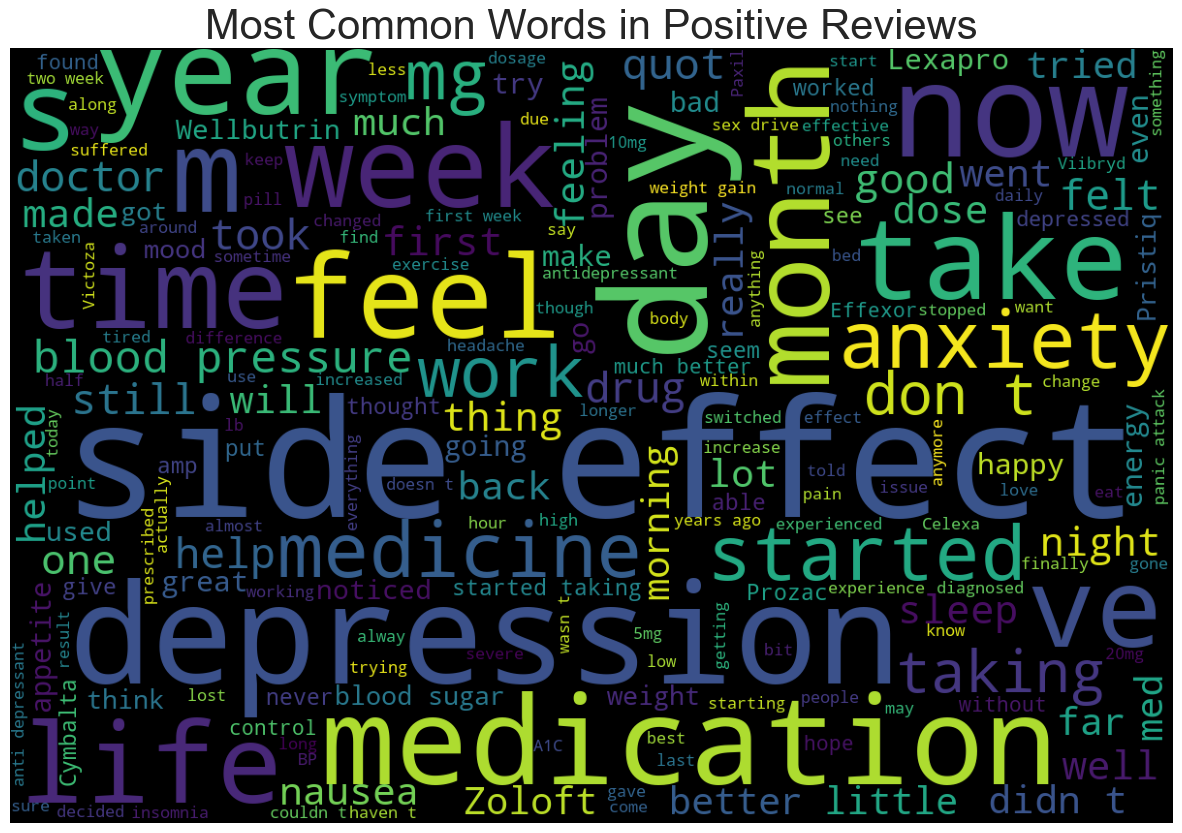

In [51]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in df1['review'][df1['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

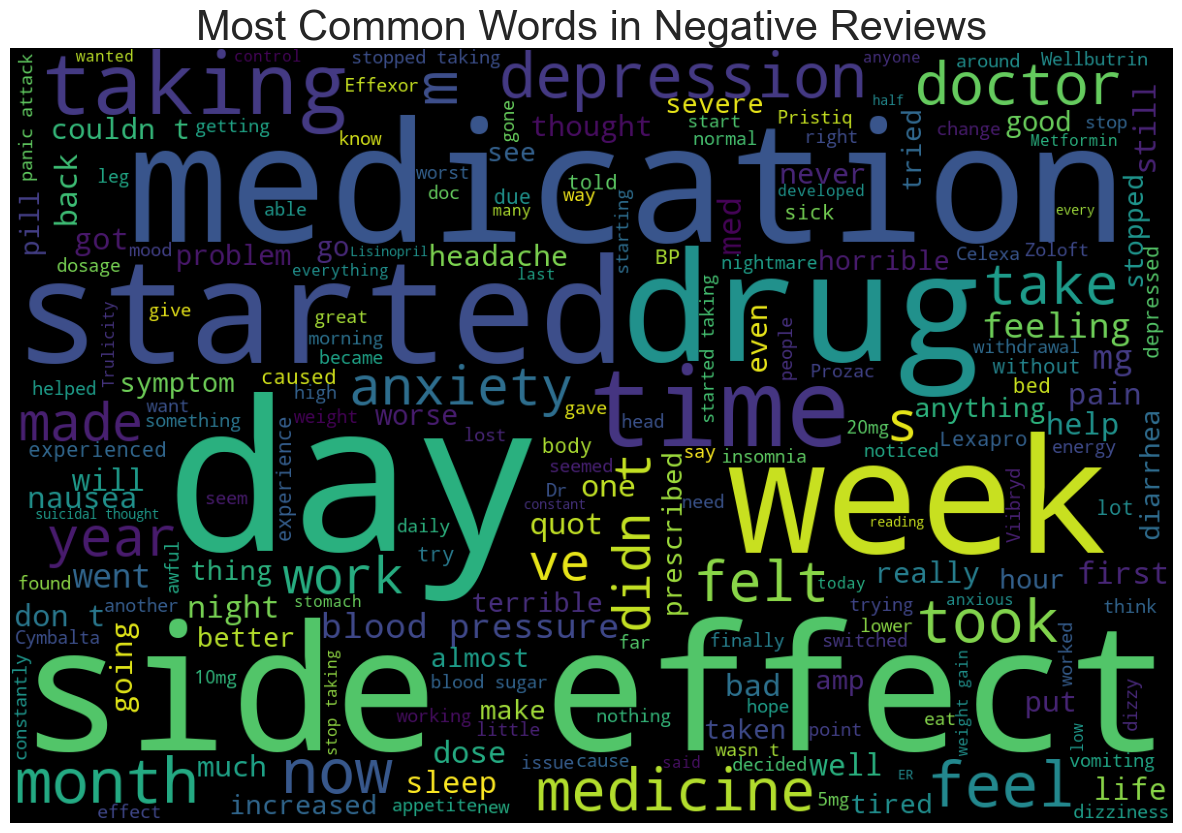

In [53]:
negative_sentiments = " ".join([text for text in df1['review'][df1['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Considering final aim to recommend drug below perimeter can be ignored 
    Top 10 drugs based on Name
        I believe its Function of availability, marketing and branding, so it do not hold good feature for analysis)
    
    Top 10 drugs based on Rating 
        User rating is based on multiple things and when it comes to giving rating in terms of numbers many users have given a good rating for 10 ratings for many drugs. I.e tthere are 72 different kind of drugs which are having highest rating of 10 in case of High blood pressure. 

## Next Step 
    Sentiment analysis on the review in oder to get out in form numbers 0-10 
    which further can be combined with useful count feature for further modelling 

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [55]:
df2 = df1

In [57]:
df2.describe()

,rating,usefulCount,Review_Sentiment
count,13944.000000,13944.000000,13944.000000
mean,6.862952,45.737880,0.749928
std,3.207061,51.782627,0.433070
min,1.000000,0.000000,0.000000
25%,4.000000,16.000000,0.000000
50%,8.000000,31.000000,1.000000
75%,10.000000,59.000000,1.000000
max,10.000000,1291.000000,1.000000


In [58]:
df2

,drugName,condition,review,rating,usefulCount,Review_Sentiment
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,0.0
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,0.0
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1.0
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,0.0


In [59]:
#### Basic text cleaning 

In [60]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [61]:
df2['review_c01'] = review_clean(df2['review'])

C:\Users\aniru\AppData\Local\Temp\ipykernel_1452\3584754075.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_1452\3584754075.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_1452\3584754075.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
C:\Users\aniru\AppData\Local\Temp\ipykernel_1452\3584754075.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
C:\Users\aniru\AppData\Local\Temp\ipykernel_1452\3584754075.py:21: FutureWarning: The default value of

In [62]:
df2['review'].loc[10]

'"My genius psychiatrist started me on this drug in the fall of 2008.  The first few weeks I felt even worse than before I had started taking the fluoxetine.  After many months on the drug I was eventually taking 400mg a day, and having manic thoughts &amp; episodes.  My psychiatrist decided I was bi-polar and then started me on seroquel (rather than give me a break for my nervous system to re-adjust to it&#039;s natural state), which I also ended up taking for about 6 months and at about the same dose.  In retrospect I wish I hadn&#039;t taken either fluoxetine(Prozac) or seroquel(Quetiapine)."'

In [63]:
df2['review_c01'].loc[10]

'my genius psychiatrist started me on this drug in the fall of 2008 the first few weeks i felt even worse than before i had started taking the fluoxetine after many months on the drug i was eventually taking 400mg a day and having manic thoughts amp episodes my psychiatrist decided i was bi polar and then started me on seroquel rather than give me a break for my nervous system to re adjust to its natural state which i also ended up taking for about 6 months and at about the same dose in retrospect i wish i hadnt taken either fluoxetine prozac or seroquel quetiapine'

In [64]:
df2

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_c01
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0,i have taken anti depressants for years with s...
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0,1 week on zoloft for anxiety and mood swings i...
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0,my gp started me on venlafaxine yesterday to h...
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0,hey guys its been 4 months since my last post ...
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0,this medicine saved my life i was at my wits e...
...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,0.0,it is fourth blood pressure pill for me it fee...
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,0.0,while on bystolic my feet and arms were numb m...
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1.0,i just got diagnosed with type 2 my doctor pre...
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,0.0,this is the third med ive tried for anxiety an...


In [65]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [66]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df2['review_c02'] = df2['review_c01'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [67]:
df2['review'].loc[10]

'"My genius psychiatrist started me on this drug in the fall of 2008.  The first few weeks I felt even worse than before I had started taking the fluoxetine.  After many months on the drug I was eventually taking 400mg a day, and having manic thoughts &amp; episodes.  My psychiatrist decided I was bi-polar and then started me on seroquel (rather than give me a break for my nervous system to re-adjust to it&#039;s natural state), which I also ended up taking for about 6 months and at about the same dose.  In retrospect I wish I hadn&#039;t taken either fluoxetine(Prozac) or seroquel(Quetiapine)."'

In [68]:
df2['review_c02'].loc[10]

'genius psychiatrist started drug fall 2008 first weeks felt even worse started taking fluoxetine many months drug eventually taking 400mg day manic thoughts amp episodes psychiatrist decided bi polar started seroquel rather give break nervous system adjust natural state also ended taking 6 months dose retrospect wish hadnt taken either fluoxetine prozac seroquel quetiapine'

In [58]:
### lemmatizing the text data 

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
import nltk
from nltk.stem import WordNetLemmatizer
 
# Create WordNetLemmatizer object
wnlt = WordNetLemmatizer()

# sentence lemmatization examples
string = df2['review_c02'].loc[10]
 
# Converting String into tokens
list2 = nltk.word_tokenize(string)
print(list2)
#> ['the', 'cat', 'is', 'sitting', 'with', 'the', 'bats', 'on',
#   'the', 'striped', 'mat', 'under', 'many', 'flying', 'geese']
 
lemmatized_string = ' '.join([wnlt.lemmatize(words) for words in list2])
 
print(lemmatized_string)  
#> the cat is sitting with the bat on the striped mat under many flying goose

['genius', 'psychiatrist', 'started', 'drug', 'fall', '2008', 'first', 'weeks', 'felt', 'even', 'worse', 'started', 'taking', 'fluoxetine', 'many', 'months', 'drug', 'eventually', 'taking', '400mg', 'day', 'manic', 'thoughts', 'amp', 'episodes', 'psychiatrist', 'decided', 'bi', 'polar', 'started', 'seroquel', 'rather', 'give', 'break', 'nervous', 'system', 'adjust', 'natural', 'state', 'also', 'ended', 'taking', '6', 'months', 'dose', 'retrospect', 'wish', 'hadnt', 'taken', 'either', 'fluoxetine', 'prozac', 'seroquel', 'quetiapine']
genius psychiatrist started drug fall 2008 first week felt even worse started taking fluoxetine many month drug eventually taking 400mg day manic thought amp episode psychiatrist decided bi polar started seroquel rather give break nervous system adjust natural state also ended taking 6 month dose retrospect wish hadnt taken either fluoxetine prozac seroquel quetiapine


In [71]:
import spacy
nlp = spacy.load('en_core_web_sm')
 
# Create a Doc object
doc = nlp(df2['review_c02'].loc[10])
 
# Create list of tokens from given string
tokens = []
for token in doc:
    tokens.append(token)
 
print(tokens)
#> [the, bats, saw, the, cats, with, best, stripes, hanging, upside, down, by, their, feet]
 
lemmatized_sentence = " ".join([token.lemma_ for token in doc])
 
print(lemmatized_sentence)
#> the bat see the cat with good stripe hang upside down by -PRON- foot

[genius, psychiatrist, started, drug, fall, 2008, first, weeks, felt, even, worse, started, taking, fluoxetine, many, months, drug, eventually, taking, 400, mg, day, manic, thoughts, amp, episodes, psychiatrist, decided, bi, polar, started, seroquel, rather, give, break, nervous, system, adjust, natural, state, also, ended, taking, 6, months, dose, retrospect, wish, had, nt, taken, either, fluoxetine, prozac, seroquel, quetiapine]
genius psychiatrist start drug fall 2008 first week feel even bad started take fluoxetine many month drug eventually take 400 mg day manic thought amp episode psychiatrist decide bi polar start seroquel rather give break nervous system adjust natural state also end take 6 month dose retrospect wish have not take either fluoxetine prozac seroquel quetiapine


In [72]:
import time

start_time = time.time()

def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

df2['review_c03'] = df2['review_c02'].apply(lambda x: ' '.join([lemmatize_word(word) for word in x.split()]))

end_time = time.time()

print("Time taken: ", end_time - start_time, "seconds")

Time taken:  1.7010622024536133 seconds


In [73]:
df2

,drugName,condition,review,rating,usefulCount,Review_Sentiment,review_c01,review_c02,review_c03
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,54,1.0,i have taken anti depressants for years with s...,taken anti depressants years improvement mostl...,taken anti depressant year improvement mostly ...
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,3,1.0,1 week on zoloft for anxiety and mood swings i...,1 week zoloft anxiety mood swings take 50mg mo...,1 week zoloft anxiety mood swing take 50mg mor...
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,3,0.0,my gp started me on venlafaxine yesterday to h...,gp started venlafaxine yesterday help depressi...,gp started venlafaxine yesterday help depressi...
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,24,1.0,hey guys its been 4 months since my last post ...,hey guys 4 months since last post wanted give ...,hey guy 4 month since last post wanted give mo...
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,166,1.0,this medicine saved my life i was at my wits e...,medicine saved life wits end anti depressants ...,medicine saved life wit end anti depressant re...
...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,39,0.0,it is fourth blood pressure pill for me it fee...,fourth blood pressure pill feels like partly w...,fourth blood pressure pill feel like partly wo...
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,25,0.0,while on bystolic my feet and arms were numb m...,bystolic feet arms numb blood sugars became se...,bystolic foot arm numb blood sugar became seve...
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,47,1.0,i just got diagnosed with type 2 my doctor pre...,got diagnosed type 2 doctor prescribed invokan...,got diagnosed type 2 doctor prescribed invokan...
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,33,0.0,this is the third med ive tried for anxiety an...,third med ive tried anxiety mild depression we...,third med ive tried anxiety mild depression we...


In [74]:
to_drop = ['review','review_c01','review_c02']
df3 = df2.drop(to_drop, axis=1)

In [75]:
df2['review'].loc[10]

'"My genius psychiatrist started me on this drug in the fall of 2008.  The first few weeks I felt even worse than before I had started taking the fluoxetine.  After many months on the drug I was eventually taking 400mg a day, and having manic thoughts &amp; episodes.  My psychiatrist decided I was bi-polar and then started me on seroquel (rather than give me a break for my nervous system to re-adjust to it&#039;s natural state), which I also ended up taking for about 6 months and at about the same dose.  In retrospect I wish I hadn&#039;t taken either fluoxetine(Prozac) or seroquel(Quetiapine)."'

In [76]:
df3['review_c03'].loc[10]

'genius psychiatrist started drug fall 2008 first week felt even worse started taking fluoxetine many month drug eventually taking 400mg day manic thought amp episode psychiatrist decided bi polar started seroquel rather give break nervous system adjust natural state also ended taking 6 month dose retrospect wish hadnt taken either fluoxetine prozac seroquel quetiapine'

In [65]:
df3

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03
0,L-methylfolate,Depression,10.0,54,1.0,taken anti depressant year improvement mostly ...
1,Sertraline,Depression,8.0,3,1.0,1 week zoloft anxiety mood swing take 50mg mor...
2,Venlafaxine,Depression,4.0,3,0.0,gp started venlafaxine yesterday help depressi...
3,Dulaglutide,"Diabetes, Type 2",10.0,24,1.0,hey guy 4 month since last post wanted give mo...
4,Effexor XR,Depression,10.0,166,1.0,medicine saved life wit end anti depressant re...
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,0.0,fourth blood pressure pill feel like partly wo...
13940,Bystolic,High Blood Pressure,1.0,25,0.0,bystolic foot arm numb blood sugar became seve...
13941,Invokana,"Diabetes, Type 2",9.0,47,1.0,got diagnosed type 2 doctor prescribed invokan...
13942,Vortioxetine,Depression,2.0,33,0.0,third med ive tried anxiety mild depression we...


In [77]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [78]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [79]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        # print (sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #
    return sent_score

In [80]:
df3

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03
0,L-methylfolate,Depression,10.0,54,1.0,taken anti depressant year improvement mostly ...
1,Sertraline,Depression,8.0,3,1.0,1 week zoloft anxiety mood swing take 50mg mor...
2,Venlafaxine,Depression,4.0,3,0.0,gp started venlafaxine yesterday help depressi...
3,Dulaglutide,"Diabetes, Type 2",10.0,24,1.0,hey guy 4 month since last post wanted give mo...
4,Effexor XR,Depression,10.0,166,1.0,medicine saved life wit end anti depressant re...
...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,0.0,fourth blood pressure pill feel like partly wo...
13940,Bystolic,High Blood Pressure,1.0,25,0.0,bystolic foot arm numb blood sugar became seve...
13941,Invokana,"Diabetes, Type 2",9.0,47,1.0,got diagnosed type 2 doctor prescribed invokan...
13942,Vortioxetine,Depression,2.0,33,0.0,third med ive tried anxiety mild depression we...


In [81]:
import time

start_time = time.time()

df3['review_rate'] = df3['review_c03'].apply(calculate_sentiment)
df3

end_time = time.time()

print("Time taken: ", end_time - start_time, "seconds")

Time taken:  115.52294707298279 seconds


In [82]:
Dep01 = df3[df3['condition'].isin(['Depression'])]
Dep01

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03,review_rate
0,L-methylfolate,Depression,10.0,54,1.0,taken anti depressant year improvement mostly ...,4
1,Sertraline,Depression,8.0,3,1.0,1 week zoloft anxiety mood swing take 50mg mor...,-5
2,Venlafaxine,Depression,4.0,3,0.0,gp started venlafaxine yesterday help depressi...,-3
4,Effexor XR,Depression,10.0,166,1.0,medicine saved life wit end anti depressant re...,3
5,Wellbutrin,Depression,4.0,15,0.0,started taking slept well night awoke early ar...,-7
...,...,...,...,...,...,...,...
13934,Zoloft,Depression,8.0,80,1.0,little two month taking 50mg zoloft feel happi...,12
13935,Rexulti,Depression,8.0,41,1.0,third week 05 mg add paxil first week thought ...,7
13936,Seroquel,Depression,10.0,36,1.0,seroquel several year helped greatly symptom r...,5
13938,Sertraline,Depression,3.0,6,0.0,taking wellbutrin depression stopped working d...,-4


In [83]:
# Top 10 drugs by higest review rate  
Dep01['review_rate'].sort_values(ascending = False).head(10)

1127     30
7696     30
8142     27
8103     27
8946     27
2922     25
11417    23
92       23
5874     22
6558     22
Name: review_rate, dtype: int64

In [84]:
df3.loc[1127]

drugName                                                   Trintellix
condition                                                  Depression
rating                                                           10.0
usefulCount                                                       128
Review_Sentiment                                                  1.0
review_c03          december 2016 started 5mg trintellix id reache...
review_rate                                                        30
Name: 1127, dtype: object

In [85]:
print (df2['review'].loc[1127])

"December 2016 I started on 5mg of Trintellix. I&#039;d reached a point in life, 65, where my life was more than I could ask for: good job, strong marriage, good friends, healthy, and yet I lived a dark cloud of fatigue and disconnection, lacking excitement and motivation. I was just maintaining. So I tried Trintellix. I&#039;m now on 10mg. For me I&#039;ve had little to no symptoms, and a rebirth of joy, motivation, and creativity. I&#039;ve also added a weekly exercise routine at the local Planet Fitness. Between diet and exercise I find this modern medicine to be a miracle. Of course I realize my body will probably adjust to this feeling and I wont&#039; be quite &#039;euphoric&#039; forever, but I now know what feeling good feels like."


In [86]:
# Top 5 Drugs for Depression are as below
print ('---------------------------------------- ')
print (Dep01[['drugName', 'rating','review_rate','usefulCount']].loc[1127])
print ('---------------------------------------- ')
print (Dep01[['drugName', 'rating','review_rate','usefulCount']].loc[7696])
print ('---------------------------------------- ')
print (Dep01[['drugName', 'rating','review_rate','usefulCount']].loc[8142])
print ('---------------------------------------- ')
print (Dep01[['drugName', 'rating','review_rate','usefulCount']].loc[8103])
print ('---------------------------------------- ')
print (Dep01[['drugName', 'rating','review_rate','usefulCount']].loc[8946])
print ('---------------------------------------- ')

---------------------------------------- 
drugName       Trintellix
rating               10.0
review_rate            30
usefulCount           128
Name: 1127, dtype: object
---------------------------------------- 
drugName       Vortioxetine
rating                 10.0
review_rate              30
usefulCount             128
Name: 7696, dtype: object
---------------------------------------- 
drugName       Duloxetine
rating                9.0
review_rate            27
usefulCount           344
Name: 8142, dtype: object
---------------------------------------- 
drugName       Cymbalta
rating              9.0
review_rate          27
usefulCount         344
Name: 8103, dtype: object
---------------------------------------- 
drugName       Escitalopram
rating                 10.0
review_rate              27
usefulCount             131
Name: 8946, dtype: object
---------------------------------------- 


In [87]:
DB01 = df3[df3['condition'].isin(['Diabetes, Type 2'])]
DB01

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03,review_rate
3,Dulaglutide,"Diabetes, Type 2",10.0,24,1.0,hey guy 4 month since last post wanted give mo...,6
9,Dulaglutide,"Diabetes, Type 2",9.0,12,1.0,recently referred endocrinologist started trul...,-3
13,Liraglutide,"Diabetes, Type 2",5.0,18,1.0,victorza day bad nausea migranes changed energ...,-3
16,Empagliflozin,"Diabetes, Type 2",10.0,47,1.0,taking jardiance year experienced side effect ...,2
19,Victoza,"Diabetes, Type 2",10.0,6,1.0,ive victoza 13 day lost 8lbs ive also followin...,3
...,...,...,...,...,...,...,...
13921,Liraglutide,"Diabetes, Type 2",9.0,38,1.0,victoza 4 week started 0 6 week went 1 2 eight...,0
13925,Trulicity,"Diabetes, Type 2",9.0,27,1.0,medication last month taking 50 unit novolog 5...,-3
13926,Victoza,"Diabetes, Type 2",5.0,3,1.0,started 6 7 month ago low dose 1 2 daily exper...,-2
13931,Liraglutide,"Diabetes, Type 2",1.0,9,0.0,took victoza month caused gastroparesis someti...,2


In [88]:
# Top 10 drugs by higest review rate  
DB01['review_rate'].sort_values(ascending = False).head(20)

7471     17
5581     17
4133     16
12484    16
3360     16
7472     16
2395     15
9464     15
5687     15
3149     15
12380    15
3084     14
8242     14
7057     14
7819     14
11918    14
3211     13
9710     13
9571     13
10468    13
Name: review_rate, dtype: int64

In [89]:
df3.loc[5581]

drugName                                                      Victoza
condition                                            Diabetes, Type 2
rating                                                            9.0
usefulCount                                                        68
Review_Sentiment                                                  1.0
review_c03          love victoza 8 week a1c gone 8 2 6 4 cant wait...
review_rate                                                        17
Name: 5581, dtype: object

In [90]:
print (df2['review'].loc[5581])

"I love Victoza!  In just 8 weeks my A1c has gone from 8.2 to 6.4.  I can&#039;t wait to see what it is after the full 90 days.  For the most part the side effects pretty much sibsided after the first month.  As long as I eat properly I feel really good.  If I eat something I shouldn&#039;t, especially something fatty, it makes me nauseous.  Processed foods do not taste good at all.  I find myself actually craving healthier foods like plain chicken and vegetables and steering clear of things with sauces or heavily flavoured foods.  I am seldom hungry and now eat approximately half what I used to eat.  Blood sugar levels have improved and in  ten weeks I have lost 30 pounds."


In [80]:
# Top 5 Drugs for Diabetic are as below
print ('---------------------------------------- ')
print (DB01[['drugName', 'rating','review_rate','usefulCount']].loc[7471])
print ('---------------------------------------- ')
print (DB01[['drugName', 'rating','review_rate','usefulCount']].loc[5581])
print ('---------------------------------------- ')
print (DB01[['drugName', 'rating','review_rate','usefulCount']].loc[4133])
print ('---------------------------------------- ')
print (DB01[['drugName', 'rating','review_rate','usefulCount']].loc[3360])
print ('---------------------------------------- ')
print (DB01[['drugName', 'rating','review_rate','usefulCount']].loc[7472])
print ('---------------------------------------- ')

---------------------------------------- 
drugName       Liraglutide
rating                 9.0
review_rate             17
usefulCount             68
Name: 7471, dtype: object
---------------------------------------- 
drugName       Victoza
rating             9.0
review_rate         17
usefulCount         68
Name: 5581, dtype: object
---------------------------------------- 
drugName       Bydureon
rating             10.0
review_rate          16
usefulCount          52
Name: 4133, dtype: object
---------------------------------------- 
drugName       Invokana
rating             10.0
review_rate          16
usefulCount           6
Name: 3360, dtype: object
---------------------------------------- 
drugName       Canagliflozin
rating                  10.0
review_rate               16
usefulCount                6
Name: 7472, dtype: object
---------------------------------------- 


In [91]:
df3

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03,review_rate
0,L-methylfolate,Depression,10.0,54,1.0,taken anti depressant year improvement mostly ...,4
1,Sertraline,Depression,8.0,3,1.0,1 week zoloft anxiety mood swing take 50mg mor...,-5
2,Venlafaxine,Depression,4.0,3,0.0,gp started venlafaxine yesterday help depressi...,-3
3,Dulaglutide,"Diabetes, Type 2",10.0,24,1.0,hey guy 4 month since last post wanted give mo...,6
4,Effexor XR,Depression,10.0,166,1.0,medicine saved life wit end anti depressant re...,3
...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,4.0,39,0.0,fourth blood pressure pill feel like partly wo...,-5
13940,Bystolic,High Blood Pressure,1.0,25,0.0,bystolic foot arm numb blood sugar became seve...,-4
13941,Invokana,"Diabetes, Type 2",9.0,47,1.0,got diagnosed type 2 doctor prescribed invokan...,4
13942,Vortioxetine,Depression,2.0,33,0.0,third med ive tried anxiety mild depression we...,-9


In [92]:
BP01 = df3[df3['condition'].isin(['High Blood Pressure'])]
BP01

,drugName,condition,rating,usefulCount,Review_Sentiment,review_c03,review_rate
7,Amlodipine / olmesartan,High Blood Pressure,10.0,10,1.0,blood pressure around 160 100 doctor prescribe...,3
15,Lisinopril,High Blood Pressure,10.0,55,1.0,im 27 year old white male good shape always hi...,6
17,Metoprolol,High Blood Pressure,2.0,19,0.0,metoprolol er 12 5mg since september 20th firs...,2
36,Prazosin,High Blood Pressure,6.0,2,1.0,using parasomnia bph bp kind silver bullet new...,3
43,Metoprolol,High Blood Pressure,10.0,55,1.0,took lopressor 24 year worked well lowering bl...,-1
...,...,...,...,...,...,...,...
13932,Bystolic,High Blood Pressure,10.0,76,1.0,im 54 year old non smoker 58 quot 145 lb amp h...,9
13937,Losartan,High Blood Pressure,2.0,105,0.0,took along beta blocker although mechanism med...,-1
13939,Metoprolol,High Blood Pressure,4.0,39,0.0,fourth blood pressure pill feel like partly wo...,-5
13940,Bystolic,High Blood Pressure,1.0,25,0.0,bystolic foot arm numb blood sugar became seve...,-4


In [93]:
# Top 10 drugs by higest review rate  
BP01['review_rate'].sort_values(ascending = False).head(20)

8975     17
1042     17
4961     15
298      14
9631     14
11978    13
3312     13
12525    12
10116    12
8609     12
11782    11
5696     11
11968    11
5382     11
10090    11
1762     11
13539    11
11061    11
2896     11
4126     11
Name: review_rate, dtype: int64

In [94]:
df3.loc[8975]

drugName                                      Amlodipine / olmesartan
condition                                         High Blood Pressure
rating                                                           10.0
usefulCount                                                        30
Review_Sentiment                                                  1.0
review_c03          went several bp med made sleep day others work...
review_rate                                                        17
Name: 8975, dtype: object

In [95]:
print (df2['review'].loc[8975])

"I went through several BP meds.  Some made me sleep all day and others just did not work.  I have two young boys, and I knew I needed something that really worked.  After a year or so of the wrong medicines, my doctor put me on Azor. Like everyone here my improvement was so sudden and so good.  I was immediately back on the top of my game in work and home life.  Like I said, I have two boys - under 6!  I cannot afford to make an early exit from this world. Azor is helping massively.  Now I need to do my part and lose 50 pounds!  Good luck to all. Ask your doctor about this one."


In [96]:
# Top 5 Drugs for HIgh Blood Pressure are as below
print ('---------------------------------------- ')
print (BP01[['drugName', 'rating','review_rate','usefulCount']].loc[8975])
print ('---------------------------------------- ')
print (BP01[['drugName', 'rating','review_rate','usefulCount']].loc[1042])
print ('---------------------------------------- ')
print (BP01[['drugName', 'rating','review_rate','usefulCount']].loc[9631])
print ('---------------------------------------- ')
print (BP01[['drugName', 'rating','review_rate','usefulCount']].loc[11978])
print ('---------------------------------------- ')
print (BP01[['drugName', 'rating','review_rate','usefulCount']].loc[3312])
print ('---------------------------------------- ')

---------------------------------------- 
drugName       Amlodipine / olmesartan
rating                            10.0
review_rate                         17
usefulCount                         30
Name: 8975, dtype: object
---------------------------------------- 
drugName       Azor
rating         10.0
review_rate      17
usefulCount      30
Name: 1042, dtype: object
---------------------------------------- 
drugName       Hydrochlorothiazide / olmesartan
rating                                      5.0
review_rate                                  14
usefulCount                                   7
Name: 9631, dtype: object
---------------------------------------- 
drugName       Lisinopril
rating                3.0
review_rate            13
usefulCount            31
Name: 11978, dtype: object
---------------------------------------- 
drugName       Amlodipine
rating                8.0
review_rate            13
usefulCount           145
Name: 3312, dtype: object
-----------------------

## Top 3 drugs based on user review 

### Depression : 
Trintellix
Vortioxetine
Duloxetine

### Dibetic Type 2 : 
Liraglutide
Victoza
Bydureon
Invokana
Canagliflozin

### High Blood Pressure : 
Amlodipine / olmesartan
Azor
Hydrochlorothiazide / olmesartan
Lisinopril
Amlodipine